In [2]:
import os
import json
import numpy as np

import bids
from bids import BIDSLayout
#from bids.analysis import auto_model
#from bids.analysis import Analysis

In [3]:
project_dir = os.path.join('/bgfs/bchandrasekaran/krs228/data/', 'FLT/')
bidsroot = os.path.join(project_dir,'data_bids')
deriv_dir = os.path.join(project_dir, 'derivatives')

In [4]:
bidsroot

'/bgfs/bchandrasekaran/krs228/data/FLT/data_bids'

In [5]:
nilearn_dir = os.path.join(deriv_dir, 'nilearn')
if not os.path.exists(nilearn_dir):
        os.makedirs(nilearn_dir)

In [6]:
task_list = ['tonecat']

In [12]:
data_dir = bidsroot
derivatives_folder = os.path.join(deriv_dir, 'fmriprep') # os.path.join(bidsroot, 'derivatives', 'fmriprep')

In [13]:
print(derivatives_folder)

/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep


In [ ]:
sub_list = []

## generate anatomical masks

In [105]:
def generate_mask(sub_id, zmap_example_fpath, atlas_spacet1w_fpath, labelnum, labelname, out_dir):
    from nilearn.image import resample_to_img
    
    print(atlas_spacet1w_fpath)
    atlas_img = nib.load(atlas_fpath)
    atlas_data = atlas_img.get_fdata()
    atlas_affine = atlas_img.affine

    mask_data[np.where(atlas_data == labelnum)] = 1

    mask_img = nib.Nifti1Image(mask_data, atlas_affine)

    mask_func_img = resample_to_img(mask_img, zmap_example_fpath, interpolation='nearest')
    
    out_fpath = os.path.join(out_dir, 'sub-%s_mask-%s.nii.gz'%(sub_id, labelname))
    nib.save(lh_mask_func_img, out_fpath)
    
    return out_fpath

FLT01
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT01/anat/sub-FLT01_desc-aparcaseg_dseg.nii.gz
FLT03
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT03/anat/sub-FLT03_desc-aparcaseg_dseg.nii.gz
FLT04
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT04/anat/sub-FLT04_desc-aparcaseg_dseg.nii.gz
FLT05
/bgfs/bchandrasekaran/krs228/data/FLT/derivatives/fmriprep/sub-FLT05/anat/sub-FLT05_desc-aparcaseg_dseg.nii.gz


In [ ]:
for mx, sub_id in enumerate(sub_list):
    print(sub_id)
    
    zmap_example_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/',
                                      'derivatives/nilearn/level-1_fwhm-1.50/',
                                      'sub-%s_space-T1w/trial_models/run00/'%sub_id,
                                      'sub-%s_task-tonecat_fwhm-1.50_space-T1w_contrast-di1_aN_trial3_run00_zmap.nii.gz'%sub_id)
    
    aparc_fpath = os.path.join(deriv_dir, 'fmriprep/','sub-%s/anat'%sub_id,
                                'sub-%s_desc-aparcaseg_dseg.nii.gz'%sub_id)
    

    '''
    roi_dict = {'lh_stg': 1030, 'lh_hg': 1034, 'rh_stg': 2030, 'rh_hg': 2034}
    lh_mask = np.zeros(aparc_data.shape)
    lh_mask[np.where(aparc_data == 11)] = 1 # Left-Caudate
    lh_mask[np.where(aparc_data == 12)] = 1 # Left-Putamen
    lh_mask[np.where(aparc_data == 13)] = 1 # Left-Pallidum
    lh_mask[np.where(aparc_data == 26)] = 1 # Left-Accumbens-area

    rh_mask = np.zeros(aparc_data.shape)
    rh_mask[np.where(aparc_data == 50)] = 1 # Right-Caudate
    rh_mask[np.where(aparc_data == 51)] = 1 # Right-Putamen
    rh_mask[np.where(aparc_data == 52)] = 1 # Right-Pallidum
    rh_mask[np.where(aparc_data == 58)] = 1 # Right-Accumbens-area
    '''

    mask_fpath = generate_mask(sub_id, zmap_example_fpath, aparc_fpath, 1034, 'L-TTG', nilearn_dir)

## Decoding

In [15]:
from glob import glob

from nilearn.decoding import Decoder
from nilearn.input_data import NiftiMasker

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [16]:
#sx = 1
sub_id = 'FLT04'
fwhm_sub = 1.5
space_label = 'T1w' 

nilearn_sub_dir = os.path.join(bidsroot, 'derivatives', 'nilearn', 
                                               'level-1_fwhm-%.02f'%fwhm_sub, 
                                               'sub-%s_space-%s'%(sub_id, space_label))
print(nilearn_sub_dir)

z_maps = sorted(glob(nilearn_sub_dir+'/trial_models'+'/run*/*di*nii.gz'))
print('# of z-maps: ', len(z_maps))

# 16 stimulus decoding
conditions_all = [os.path.basename(x)[-31:-18] for x in z_maps] 
print(conditions_all[:10])

# 4-category decoding
conditions_tone = [stim[:3] for stim in conditions_all]
print(conditions_tone[:10])

conditions_talker = [stim[4:6] for stim in conditions_all]
print(conditions_talker[:10])

# pick the labels
conditions = conditions_tone

print('# of trials: ', len(conditions))
print(conditions[:10])
print('unique # of conditions = ', np.unique(conditions).shape)

/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w
# of z-maps:  288
['di1_aN_trial1', 'di1_aN_trial2', 'di1_aN_trial3', 'di1_bN_trial1', 'di1_bN_trial2', 'di1_bN_trial3', 'di1_hN_trial1', 'di1_hN_trial2', 'di1_hN_trial3', 'di1_iN_trial1']
['di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1']
['aN', 'aN', 'aN', 'bN', 'bN', 'bN', 'hN', 'hN', 'hN', 'iN']
# of trials:  288
['di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1', 'di1']
unique # of conditions =  (4,)


In [17]:
z_maps[0][-31:-18]

'di1_aN_trial1'

In [18]:
z_maps

['/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/run00/sub-FLT04_task-tonecat_fwhm-1.50_space-T1w_contrast-di1_aN_trial1_run00_zmap.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/run00/sub-FLT04_task-tonecat_fwhm-1.50_space-T1w_contrast-di1_aN_trial2_run00_zmap.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/run00/sub-FLT04_task-tonecat_fwhm-1.50_space-T1w_contrast-di1_aN_trial3_run00_zmap.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/run00/sub-FLT04_task-tonecat_fwhm-1.50_space-T1w_contrast-di1_bN_trial1_run00_zmap.nii.gz',
 '/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/run00/sub-FLT04_task-toneca

### Nilearn `Decoder` accuracies

from https://nilearn.github.io/auto_examples/02_decoding/plot_haxby_glm_decoding.html#build-the-decoding-pipeline

**note: does not generate predictions for each fold, so cannot use for confusion matrix generation**

In [19]:
n_runs = 6
split_index = round(len(z_maps) * (n_runs-1) / n_runs)
print('# of training images = ', split_index)

# of training images =  240


In [44]:
mask_descrip = 'Right-Putamen'
mask_fpath = nib.load(os.path.join(nilearn_dir, 'sub-%s_mask-%s.nii.gz'%(sub_id, mask_descrip)))

cv = 5
decoder=Decoder(estimator='svc', 
                mask=mask_fpath,
                standardize=False,
                screening_percentile=10, 
                cv=cv,
               )
#decoder.fit(z_maps[:split_index], conditions[:split_index])
decoder.fit(z_maps, conditions)

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/nilearn/_utils/param_validation.py:197: UserWarning: Brain mask is smaller than .5% of the volume human brain. This object is probably not tuned tobe used on such data.
  screening_percentile_ = _adjust_screening_percentile(


In [45]:
classification_accuracy = np.mean(list(decoder.cv_scores_.values()))
chance_level = 1. / len(np.unique(conditions))
print('{} {} classification accuracy: {:.3f} / Chance level: {}'.format(
       sub_id, mask_descrip, classification_accuracy, chance_level))

FLT04 Right-Putamen classification accuracy: 0.518311 / Chance level: 0.25


saved figure to  /bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/masked_data/FLT04_space-T1w_roi-Right-Putamen_trial_decoding_accuracy.png


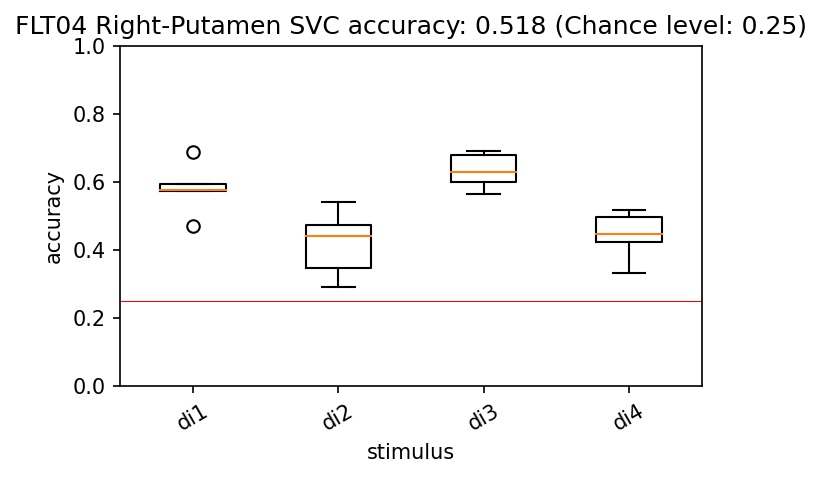

In [46]:
# Create and save prediction accuracy plot

os.makedirs(os.path.join(nilearn_sub_dir, 'trial_models', 'masked_data'), exist_ok=True)

region_string = mask_descrip

acc_plot_fpath = os.path.join(nilearn_sub_dir, 'trial_models', 'masked_data',
                                '%s_space-%s_roi-%s_trial_decoding_accuracy.png'%(sub_id, 
                                                                           space_label,
                                                                           mask_descrip))

from matplotlib import pyplot as plt
#plt.figure(figsize=(8,3), dpi=150)
plt.figure(figsize=(5,3), dpi=150)
plt.boxplot(list(decoder.cv_scores_.values()));
plt.axhline(y=chance_level, color='r', linewidth=0.5)
plt.title('{} {} SVC accuracy: {:.03f} (Chance level: {})'.format(
            sub_id, region_string, classification_accuracy, chance_level))
plt.xlabel('stimulus')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.xticks(range(1, len(np.unique(conditions))+1), 
           np.unique(conditions), 
           rotation=30);


# save figure
plt.savefig(acc_plot_fpath)
print('saved figure to ', acc_plot_fpath)


In [47]:
decoder.cv_scores_

{'di1': [0.4697674418604651,
  0.6883720930232559,
  0.5925324675324676,
  0.5730897009966778,
  0.5764119601328903],
 'di2': [0.2889610389610389,
  0.4724025974025974,
  0.3472868217054264,
  0.4396825396825397,
  0.5415282392026578],
 'di3': [0.6294573643410852,
  0.6006493506493507,
  0.689935064935065,
  0.6794019933554817,
  0.5634920634920635],
 'di4': [0.5162337662337663,
  0.3302325581395349,
  0.4232558139534883,
  0.4966777408637874,
  0.446843853820598]}

In [48]:
len(decoder.coef_img_)

4

In [49]:
decoder.coef_img_

{'di1': <nibabel.nifti1.Nifti1Image at 0x7ff6afda3d00>,
 'di2': <nibabel.nifti1.Nifti1Image at 0x7ff69de96520>,
 'di3': <nibabel.nifti1.Nifti1Image at 0x7ff69de96880>,
 'di4': <nibabel.nifti1.Nifti1Image at 0x7ff6a58e3a90>}

In [50]:
# save 4-D decoding coefficient images to nifti (3-D x trial type prediction)
decoding_dir = os.path.join(nilearn_sub_dir, 'trial_models', 'masked_data', 'decoding')
os.makedirs(decoding_dir, exist_ok=True)
print('saving files to ', decoding_dir)

for ix, decoder_cond in enumerate(decoder.coef_img_):
    decoder_img = decoder.coef_img_[decoder_cond]
    decoder_img_fpath = os.path.join(decoding_dir,
                                     '%s_space-%s_roi-%s_trial_decoding_cond-%s.nii.gz'%(sub_id, 
                                                                               space_label,
                                                                               mask_descrip,
                                                                               decoder_cond))
    nib.save(decoder_img, decoder_img_fpath)

saving files to  /bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/masked_data/decoding


In [51]:
# Extract and save masked timeseries data (for analyzing outside of Decoder method)

masker = NiftiMasker(mask_img=mask_fpath, smoothing_fwhm=None, standardize=False)
masked_data = masker.fit_transform(z_maps)

print(masked_data.shape)

masked_data_fpath = os.path.join(nilearn_sub_dir, 'trial_models', 'masked_data',
                                '%s_space-%s_roi-%s_trial_zmaps.csv'%(sub_id, 
                                                                      space_label,
                                                                      mask_descrip))
np.savetxt(masked_data_fpath, masked_data)
print(masked_data_fpath)

conditions_fpath = os.path.join(nilearn_sub_dir, 'trial_models', 'masked_data',
                                '%s_space-%s_roi-%s_trial_conditions.csv'%(sub_id, 
                                                                           space_label,
                                                                           mask_descrip))
np.savetxt(conditions_fpath, conditions, fmt='%s')
print(conditions_fpath)

(288, 1432)
/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/masked_data/FLT04_space-T1w_roi-Right-Putamen_trial_zmaps.csv
/bgfs/bchandrasekaran/krs228/data/FLT/data_bids/derivatives/nilearn/level-1_fwhm-1.50/sub-FLT04_space-T1w/trial_models/masked_data/FLT04_space-T1w_roi-Right-Putamen_trial_conditions.csv


### Confusion matrix

In [32]:
# first, run a new classifier with a separate training and test set
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

FLT04 Left-Putamen
test trials =  48


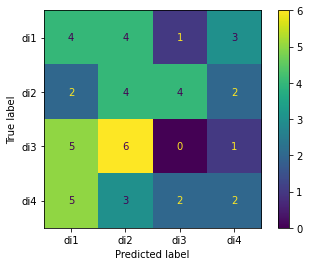

In [33]:
print(sub_id, mask_descrip)
print('test trials = ', len(conditions[split_index:]))
ConfusionMatrixDisplay.from_predictions(conditions[split_index:], y_pred, 
                                        cmap='viridis', 
                                        colorbar=True, include_values=True)

#### Plot decoder coef maps

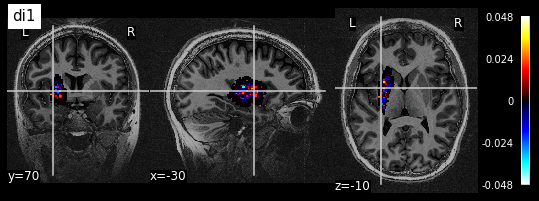

In [30]:
# T1w space (ACtx)
t1w_fpath = layout.get(return_type='filename', subject=sub_id, suffix='T1w', extension='nii.gz')[0]

# plot
for stim in np.unique(conditions): 
    decoder_img = decoder.coef_img_[stim]
    plotting.plot_stat_map(decoder_img, bg_img=t1w_fpath, colorbar=True, 
                           title=stim,
                           cut_coords=[-30, 70, -10]
                           #axes=axes[0],
                           #display_mode='x', cut_coords=6
                           )

plotting.show()


#### sklearn SVM 

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import svm

In [56]:
#masked_data_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/',
#                                   'data_bids/derivatives/nilearn/level-1_fwhm-1.50/',
#                                   'sub-FLT01_space-MNI152NLin2009cAsym/trial_models/masked_data/',
#                                   'FLT01_roi-IC_trial_zmaps.csv')
masked_data_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/',
                                   'data_bids/derivatives/nilearn/level-1_fwhm-1.50/',
                                   'sub-FLT01_space-T1w/trial_models/masked_data/',
                                   'FLT01_space-T1w_roi-actx_trial_zmaps.csv')

masked_data = np.genfromtxt(masked_data_fpath)

In [57]:
n_train = round(len(z_maps)*0.75)
n_test = len(z_maps) - n_train

In [59]:
cv = KFold(n_splits=10)

clf = svm.LinearSVC()

In [60]:
# run SVM with cross-validation and create confusion matrix
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, masked_data, conditions, cv=10)
conf_mat = confusion_matrix(conditions, y_pred)

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Libline

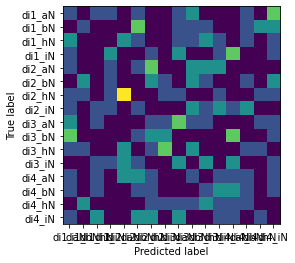

In [64]:
#print('input data file: ', masked_data_fpath)
ConfusionMatrixDisplay.from_predictions(conditions, y_pred, 
                                        cmap='viridis', colorbar=False, include_values=False)

#### TEST: confusion matrix using decoder (then replaced by SVM) 

In [103]:
cv = KFold(n_splits=10)
fold = 0
prediction = []
test_conds = []
for train, test in cv.split(conditions):
    fold += 1
    subdecode=svm.LinearSVC()
    
    # fit on the training set
    print('# of training images: ', n_train)
    print('# of testing images:  ', n_test)

    print('fitting the training data')
    subdecode.fit(masked_data[train, :], np.array(conditions)[train])
    
    # test
    print('predicting the test images')
    y_pred = subdecode.predict(masked_data[test, :])
    #print(y_pred)
    prediction.append(y_pred)
    
    #print(np.array(conditions)[test])
    test_conds.append(np.array(conditions)[test])

# of training images:  216
# of testing images:   72
fitting the training data
predicting the test images
['di4_aN' 'di4_aN' 'di3_bN' 'di3_iN' 'di4_bN' 'di3_iN' 'di3_hN' 'di4_hN'
 'di3_hN' 'di3_hN' 'di3_hN' 'di3_iN' 'di3_iN' 'di4_hN' 'di4_bN' 'di4_hN'
 'di3_hN' 'di3_iN' 'di4_bN' 'di4_hN' 'di4_hN' 'di3_iN' 'di4_bN' 'di3_iN'
 'di4_bN' 'di4_hN' 'di4_hN' 'di4_iN' 'di4_hN']
# of training images:  216
# of testing images:   72
fitting the training data
predicting the test images
['di1_aN' 'di1_hN' 'di1_bN' 'di3_aN' 'di1_aN' 'di1_aN' 'di2_iN' 'di2_aN'
 'di1_aN' 'di1_bN' 'di1_hN' 'di2_iN' 'di1_bN' 'di1_iN' 'di1_aN' 'di2_hN'
 'di1_bN' 'di1_aN' 'di2_bN' 'di3_iN' 'di4_bN' 'di3_iN' 'di3_iN' 'di2_bN'
 'di4_bN' 'di4_bN' 'di4_iN' 'di3_hN' 'di2_hN']
# of training images:  216
# of testing images:   72
fitting the training data
predicting the test images
['di4_hN' 'di4_hN' 'di1_iN' 'di1_bN' 'di3_hN' 'di4_hN' 'di1_bN' 'di4_iN'
 'di1_iN' 'di4_hN' 'di4_hN' 'di2_aN' 'di4_hN' 'di1_bN' 'di2_aN' 'di4_hN'
 'di

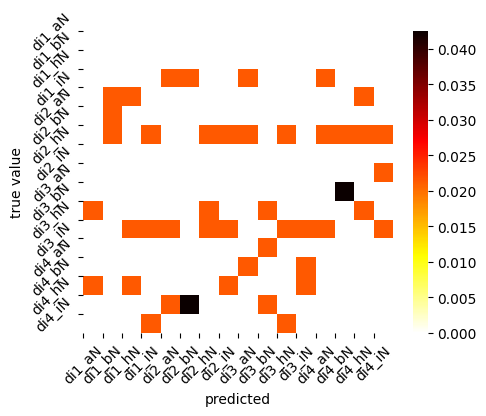

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.0212766  0.0212766
  0.         0.         0.0212766  0.         0.         0.
  0.0212766  0.         0.         0.        ]
 [0.         0.0212766  0.0212766  0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.0212766  0.        ]
 [0.         0.0212766  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.0212766  0.         0.0212766  0.         0.
  0.0212766  0.0212766  0.0212766  0.         0.0212766  0.
  0.0212766  0.0212766  0.0212766  0.0

In [346]:
import seaborn as sns
plt.figure(figsize=(5,4),dpi=100)
confusion_mat = confusion_matrix(y_pred, conditions[n_train:], normalize='all')
ax = sns.heatmap(confusion_mat, 
                 cmap='hot_r',
                )

ax.set_xticks(range(len(np.unique(conditions))))
ax.set_yticks(range(len(np.unique(conditions))))
ax.set_xticklabels(np.unique(conditions), rotation=45)
ax.set_yticklabels(np.unique(conditions), rotation=45)

#ax.set_xticklabels(range(1,5))
#ax.set_yticklabels(range(1,5))

ax.set_xlabel('predicted')
ax.set_ylabel('true value')

plt.show()
print(confusion_mat)

#### Plot decoder maps

In [113]:
# MNI space (IC)
t1w_mni_fpath = os.path.join('/bgfs/bchandrasekaran/krs228/data/FLT/',
                             'derivatives', 'fmriprep_2022.03.22',
                             'sub-FLT01/anat',
                             'sub-FLT01_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz')

# plot
for stim in np.unique(conditions): #stim_list:
    decoder_img = decoder.coef_img_[stim]
    plotting.plot_stat_map(decoder_img, bg_img=t1w_mni_fpath, colorbar=True, 
                           title=stim,
                           cut_coords=[1, -35, -9]
                           #axes=axes[0],
                           #display_mode='x', cut_coords=6
                           )

plotting.show()
